<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20220201_Compara%C3%A7%C3%A3o_Carteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código para comparação de três carteiras fictícias

01/02/22

Código original de um tutorial criado para nosso Instagram. 

Link para o tutorial: https://www.instagram.com/p/CZdCpJEorLs/

Neste código, vamos testar 3 combinações de alocações de ativos diferentes, ou seja, 3 carteiras de investimento.

Por fim, estas carteiras serão comparadas com o IBOV.

As carteiras serão criadas de acordo com as seguintes estratégias:

<b>* Carteira 01</b> - Ações que compõem a maior parte do IBOV

    Composição: 'ITUB4.SA','VALE3.SA', 'MGLU3.SA','PETR4.SA', 
          'BBDC4.SA', 'B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA', 'LREN3.SA'

Carteira 02 - Ações, ETFs, FIIs e BDRs aleatórios

    ativos02 = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
                'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA']


Carteira 03 - Exposição a ETF de S&P 500, BDRs, e ações de exportadoras brasileiras

    ativos03 = ['IVVB11.SA','GOGL34.SA', 'COCA34.SA','MSFT34.SA', 'WEGE3.SA',
                'VALE3.SA','PETR4.SA', 'SUZB3.SA', 'JBSS3.SA']

## 1. Instalando e importando bibliotecas

A única biblioteca que normalmente precisamos instalar é a <b>yfinance</b>

In [29]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from functools import reduce

## 2. Importando dados para a Carteira 01

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [3]:
ativos01 = ['ITUB4.SA','VALE3.SA', 'MGLU3.SA','PETR4.SA', 
          'BBDC4.SA', 'B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA', 'LREN3.SA']

In [4]:
inicio = '2020-01-05'
fim = '2021-12-05'

In [5]:
precos = yf.download(ativos01, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [6]:
precos.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA
Date,,,,,,,,,,,,
2020-01-06,17.749458,13.197676,47.288910,31.178711,18.262234,17.286381,34.855507,54.785282,11.932189,25.040266,47.603065,43.743118
2020-01-07,17.786785,13.623507,46.932007,30.637068,18.335094,17.597998,34.046894,54.756474,11.898048,24.942736,48.066002,44.061337
2020-01-08,17.702795,13.587008,46.503738,30.163118,18.172600,17.307789,33.492123,55.111786,12.263843,24.788319,47.829613,44.069496
2020-01-09,17.562817,13.580924,45.557961,29.680714,18.296291,17.122248,32.824551,54.689255,12.700356,24.707047,48.085697,43.490170
2020-01-10,17.628141,13.474465,44.487267,29.139061,18.553370,17.376772,32.533062,54.862106,12.632074,24.601391,47.130287,43.539127


## 3. Simulação da Carteira 01

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [7]:
compras = {'ITUB4.SA': 1200, 'VALE3.SA': 1200, 'MGLU3.SA': 1000,
           'PETR4.SA': 1000, 'BBDC4.SA': 1000, 'B3SA3.SA': 900, 
           'ABEV3.SA': 800, 'BPAC11.SA': 700, 'BBAS3.SA': 600, 
           'CSAN3.SA': 600, 'RENT3.SA': 500, 'LREN3.SA':500}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [8]:
sum(compras.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [9]:
precos.iloc[0]

ABEV3.SA     17.749458
B3SA3.SA     13.197676
BBAS3.SA     47.288910
BBDC4.SA     31.178711
BPAC11.SA    18.262234
CSAN3.SA     17.286381
ITUB4.SA     34.855507
LREN3.SA     54.785282
MGLU3.SA     11.932189
PETR4.SA     25.040266
RENT3.SA     47.603065
VALE3.SA     43.743118
Name: 2020-01-06 00:00:00, dtype: float64

Quantidade de papéis comprados de cada ativo (determinados no primeiro dia)

In [10]:
compras_df/(precos.iloc[0])

ABEV3.SA     45.071798
B3SA3.SA     68.193826
BBAS3.SA     12.687964
BBDC4.SA     32.073167
BPAC11.SA    38.330470
CSAN3.SA     34.709406
ITUB4.SA     34.427845
LREN3.SA      9.126539
MGLU3.SA     83.806919
PETR4.SA     39.935678
RENT3.SA     10.503525
VALE3.SA     27.432887
dtype: float64

Criando um dataframe que contém a posição diária de cada ativo

In [11]:
PL01 = precos*compras_df/(precos.iloc[0])

Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [12]:
PL01['Carteira 01'] = PL01.sum(axis = 1)

In [13]:
PL01.tail()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2021-11-29,708.810737,770.903258,388.793703,640.922921,816.612029,732.976941,778.320292,262.743119,673.807628,1047.664090,547.560322,1906.585613,9275.700654
2021-11-30,696.664628,744.759504,401.791360,629.539898,783.249940,725.128516,768.702864,258.294461,653.693987,1046.242125,535.613555,1918.930328,9162.611166
2021-12-01,687.988860,738.056117,394.977068,627.010385,787.041110,724.104754,763.809638,256.841840,576.591615,1052.285705,528.277828,1926.611712,9063.596632
2021-12-02,694.495707,768.221878,405.829482,658.943951,791.969572,748.673856,792.684512,259.747081,566.534794,1132.575851,562.965377,2016.042772,9398.684832
2021-12-03,694.061915,779.617843,406.334254,657.045027,799.930985,763.347075,789.934490,265.557562,590.838797,1148.550107,574.912143,1971.601630,9441.731826


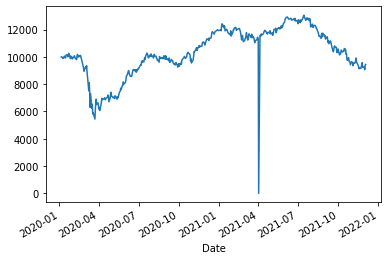

In [14]:
PL01['Carteira 01'].plot();

## 4. Obtendo dados do IBOV (ou outros benchmarks)

Obtendo dados do IBOV para comparar com a nossa carteira

In [15]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [16]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [17]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

## 5. Carteira 02

Utilizando o conhecimento adquirido para a carteira 01, vamos agora criar as carteiras 02 e 03

In [18]:
ativos02 = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA']

precos02 = yf.download(ativos02, start = inicio, end = fim)['Adj Close']

compras02 = {'BPAN4.SA': 1500, 'VALE3.SA': 1400, 'WEGE3.SA': 1300, 
           'TOTS3.SA': 1200, 'BPAC11.SA': 1100, 'KNRI11.SA': 1000, 
        'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500, 'TSLA34.SA': 500}
           
compras_df02 = pd.Series(data=compras02, index=list(compras02.keys()))

PL02 = precos02*(compras_df02/(precos02.iloc[0]))

PL02['Carteira 02'] = PL02.sum(axis = 1)

[*********************100%***********************]  10 of 10 completed


In [19]:
precos02.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-06,30.097784,18.262234,10.943400,74.25,197.979996,139.100006,22.585522,11.48750,43.743118,17.104216
2020-01-07,30.171686,18.335096,10.933975,74.25,198.750000,139.399994,22.680435,12.01500,44.061340,17.236616
2020-01-08,30.425417,18.172600,10.839717,74.25,187.500000,138.199997,22.376064,12.16325,44.069496,16.584423
2020-01-09,31.334412,18.296291,10.839717,74.25,181.000000,138.800003,22.745888,12.16325,43.490170,16.339231
2020-01-10,31.467430,18.553371,10.764310,74.25,178.899994,139.399994,22.575703,12.20000,43.539131,16.672686


In [20]:
sum(compras02.values())

10000

In [21]:
PL02.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,Carteira 02
Date,,,,,,,,,,,
2020-01-06,700.000000,1100.000000,1500.000000,500.0,1000.000000,800.000000,1200.000000,500.000000,1400.000000,1300.000000,10000.000000
2020-01-07,701.718781,1104.388778,1498.708103,500.0,1003.889303,801.725307,1205.042885,522.959745,1410.184707,1310.063055,10058.680665
2020-01-08,707.619931,1094.601025,1485.788219,500.0,947.065381,794.823815,1188.871239,529.412395,1410.445735,1260.493346,9919.121086
2020-01-09,728.760898,1102.051413,1485.788219,500.0,914.233781,798.274605,1208.520470,529.412395,1391.904366,1241.857645,9900.803793
2020-01-10,731.854579,1117.536270,1475.452260,500.0,903.626618,801.725307,1199.478301,531.011952,1393.471385,1267.201712,9921.358385


## 6. Carteira 03

In [22]:
ativos03 = ['IVVB11.SA','GOGL34.SA', 'COCA34.SA','MSFT34.SA', 'WEGE3.SA',
            'VALE3.SA','PETR4.SA', 'SUZB3.SA', 'JBSS3.SA']

precos03 = yf.download(ativos03, start = inicio, end = fim)['Adj Close']

compras03 = {'IVVB11.SA': 1500, 'GOGL34.SA': 1500, 'COCA34.SA': 1000, 
           'MSFT34.SA': 1000, 'WEGE3.SA': 1000, 'VALE3.SA': 1000, 
           'PETR4.SA': 1000, 'SUZB3.SA': 1000, 'JBSS3.SA':1000}
           
compras_df03 = pd.Series(data=compras03, index=list(compras03.keys()))

PL03 = precos03*(compras_df03/(precos03.iloc[0]))

PL03['Carteira 03'] = PL03.sum(axis = 1)

[*********************100%***********************]  9 of 9 completed


In [23]:
PL03.head()

,COCA34.SA,GOGL34.SA,IVVB11.SA,JBSS3.SA,MSFT34.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,Carteira 03
Date,,,,,,,,,,
2020-01-06,1000.000000,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000
2020-01-07,1000.000000,1504.675097,1500.0,1017.897188,993.784274,996.105211,1012.814064,1007.274704,1007.741036,10040.291574
2020-01-08,999.504720,1509.218623,1500.0,1042.878572,1007.437527,989.938309,1063.331664,1007.461239,969.610263,10089.380916
2020-01-09,999.504720,1534.240491,1500.0,1055.555556,1020.859023,986.692727,1060.620949,994.217492,955.275330,10106.966288
2020-01-10,1025.219568,1550.570627,1500.0,1049.962766,1029.023040,982.473220,1062.345967,995.336704,974.770656,10169.702548


## 7. Comparativos de carteira

In [24]:
from functools import reduce

dfs = [PL01, PL02, PL03, ibov]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

In [25]:
# Join na mão

#nova_02 = pd.merge(PL01, PL02, how = 'inner', on = 'Date')

#nova_03 = pd.merge(nova_02, PL03, how = 'inner', on = 'Date')

#nova_04 = pd.merge(ibov, nova_03, how = 'inner', on = 'Date')

In [26]:
df_final.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA_x,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA_x,...,GOGL34.SA,IVVB11.SA_y,JBSS3.SA,MSFT34.SA,PETR4.SA_y,SUZB3.SA,VALE3.SA,WEGE3.SA_y,Carteira 03,IBOV
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,800.000000,900.000000,600.000000,1000.000000,700.000000,600.000000,1200.000000,500.000000,1000.000000,1000.000000,...,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000,116878.0
2020-01-07,801.682387,929.039034,595.471627,982.627789,702.792786,610.816037,1172.161203,499.737077,997.138783,996.105059,...,1504.675097,1500.0,1017.897188,993.784274,996.105211,1012.814064,1007.274704,1007.741036,10040.291574,116662.0
2020-01-08,797.896802,926.550026,590.037772,967.426730,696.564289,600.743062,1153.061618,502.979849,1027.794866,989.938310,...,1509.218623,1500.0,1042.878572,1007.437527,989.938309,1063.331664,1007.461239,969.610263,10089.380916,116247.0
2020-01-09,791.587723,926.135170,578.037776,951.954483,701.305444,594.303039,1130.078552,499.123602,1064.377751,986.692652,...,1534.240491,1500.0,1055.555556,1020.859023,986.692727,1060.620949,994.217492,955.275330,10106.966288,115947.0
2020-01-10,794.532029,918.875346,564.452849,934.581966,711.159372,603.137423,1120.043226,500.701139,1058.655237,982.473221,...,1550.570627,1500.0,1049.962766,1029.023040,982.473220,1062.345967,995.336704,974.770656,10169.702548,115503.0


In [27]:
df_final_normalizado = df_final/df_final.iloc[0]

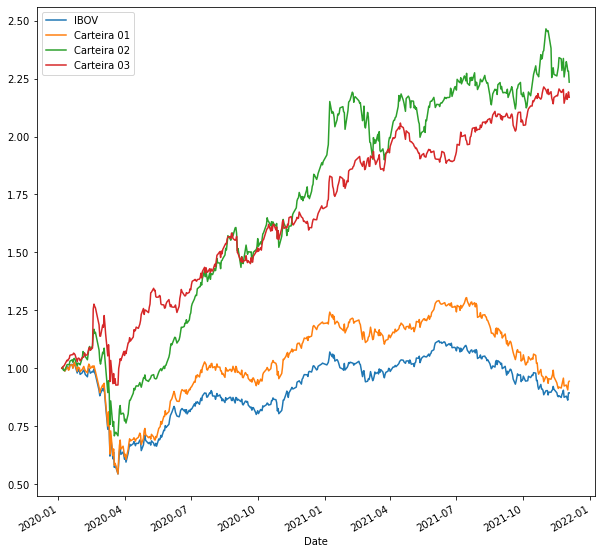

In [28]:
df_final_normalizado[['IBOV', 'Carteira 01', 'Carteira 02', 'Carteira 03']].plot(figsize = (10,10));